# EDA: ML Speaker Dataset

This notebook performs exploratory data analysis on `ml_interview_dataset_20250804_095938.csv`.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data
csv_path = 'recommendation/data/ml_interview_dataset_20250804_095938.csv'
df = pd.read_csv(csv_path)
df.head()

,first_name,last_name,email,company,title,background,experience,keywords,location
0,Trevor,Fetter,tfetter@hbs.edu,Harvard University,Senior Lecturer,Trevor Fetter is a Senior Lecturer at Harvard ...,NaN,corporate governance entrepreneurship healthca...,NaN
1,Kenneth,A. Froot,kfroot@hbs.edu,Harvard University,André R. Jakurski Professor of Business Admini...,Kenneth A. Froot is the Andr&eacute; R. Jakurs...,NaN,finance risk management international markets ...,NaN
2,David,G. Fubini,dfubini@hbs.edu,Harvard University,"Senior Lecturer of Business Administration, He...",David G. Fubini is a Senior Lecturer of Busine...,NaN,Organizational Behavior Leadership Mergers & A...,NaN
3,Susanna,Gallani,sgallani@hbs.edu,Harvard University,Tai Family Associate Professor of Business Adm...,Susanna Gallani is the Tai Family Associate Pr...,NaN,Performance Management Compensation Incentive ...,NaN
4,Christopher,Golden,christopher_golden@harvard.edu,Harvard University,Associate Professor of Nutrition and Planetary...,Christopher Golden is an Associate Professor o...,NaN,planetary health nutrition environmental chang...,NaN


In [3]:
# Basic info & shape
print(f"Shape: {df.shape}")
df.info()

Shape: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  1000 non-null   object 
 1   last_name   1000 non-null   object 
 2   email       1000 non-null   object 
 3   company     1000 non-null   object 
 4   title       916 non-null    object 
 5   background  948 non-null    object 
 6   experience  0 non-null      float64
 7   keywords    825 non-null    object 
 8   location    2 non-null      object 
dtypes: float64(1), object(8)
memory usage: 70.4+ KB


In [4]:
# Missing values by column
df.isna().sum()

first_name       0
last_name        0
email            0
company          0
title           84
background      52
experience    1000
keywords       175
location       998
dtype: int64

In [5]:
# Unique counts for key columns
for col in ['company','title','location']:
    print(f"{col}: {df[col].nunique()} unique values")

company: 327 unique values
title: 716 unique values
location: 2 unique values


In [6]:
# Feature engineering for EDA
df['keyword_count'] = df['keywords'].fillna('').apply(lambda x: len([w for w in x.split(',') if w.strip()]))
df['background_length'] = df['background'].fillna('').apply(len)
df[['keyword_count','background_length']].describe()

,keyword_count,background_length
count,1000.00000,1000.000000
mean,1.53600,818.996000
std,2.56969,315.600256
min,0.00000,0.000000
25%,1.00000,636.750000
50%,1.00000,845.000000
75%,1.00000,1025.000000
max,39.00000,1619.000000


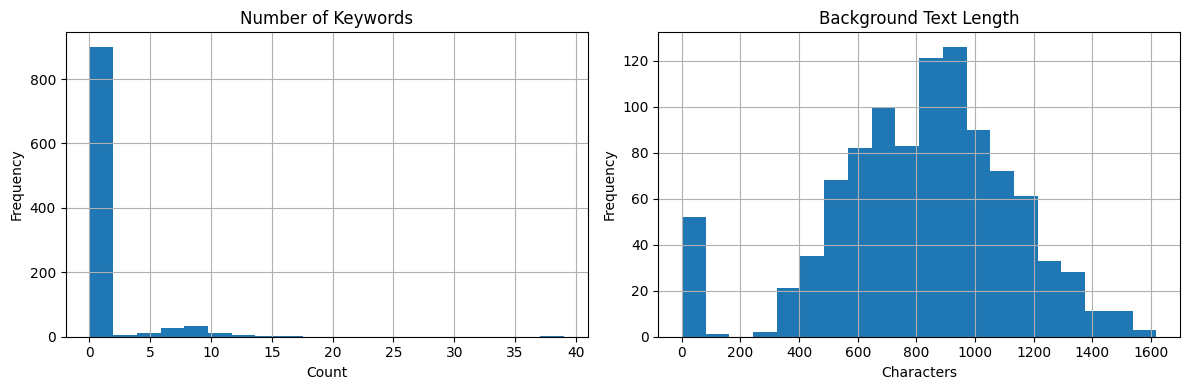

In [7]:
# Plot distributions
fig, axes = plt.subplots(1,2, figsize=(12,4))
df['keyword_count'].hist(bins=20, ax=axes[0])
axes[0].set_title('Number of Keywords')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Frequency')

df['background_length'].hist(bins=20, ax=axes[1])
axes[1].set_title('Background Text Length')
axes[1].set_xlabel('Characters')
axes[1].set_ylabel('Frequency')

plt.tight_layout()

Top 20 Companies:
 company
Harvard University                                                                            129
NBER National Bureau of Economic Research                                                      61
Princeton University                                                                           39
Korn Ferry                                                                                     36
Microsoft                                                                                      30
Stanford University                                                                            29
"Google                                                                                        27
Bain Company                                                                                   27
University of Michigan                                                                         22
The URL belongs to SIIS which stands for the Shanghai Institutes for International Studies 

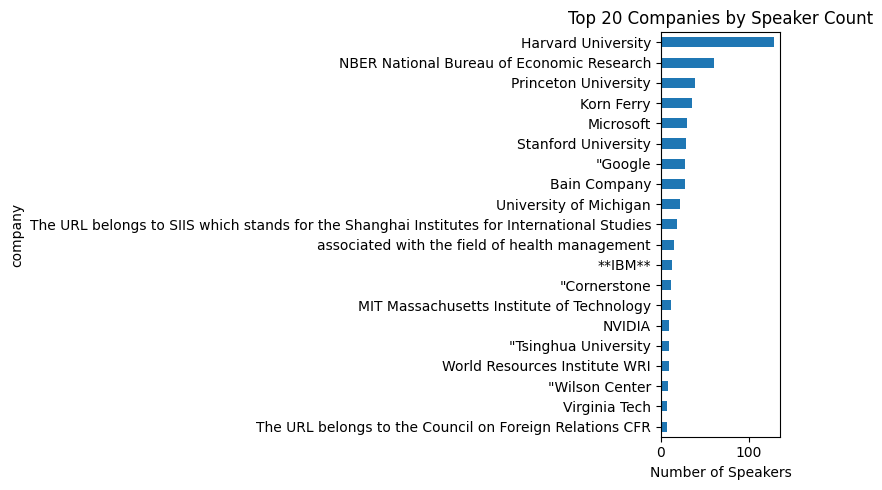

Top 20 Titles:
 title
Unknown                                       84
Partner                                       22
Professor                                     18
Research Scientist                            12
Researcher                                    11
Adjunct Lecturer in Public Policy             10
Principal                                      8
Research Associate                             8
Managing Director                              8
Senior Fellow                                  7
Senior Client Partner                          7
Senior Manager                                 6
Associate                                      6
Associate Professor                            6
Senior Research Scientist                      6
Vice President                                 5
Professor of Economics                         5
Research Associate, Professor                  4
Assistant Research Fellow                      4
Senior Lecturer of Business Administration     

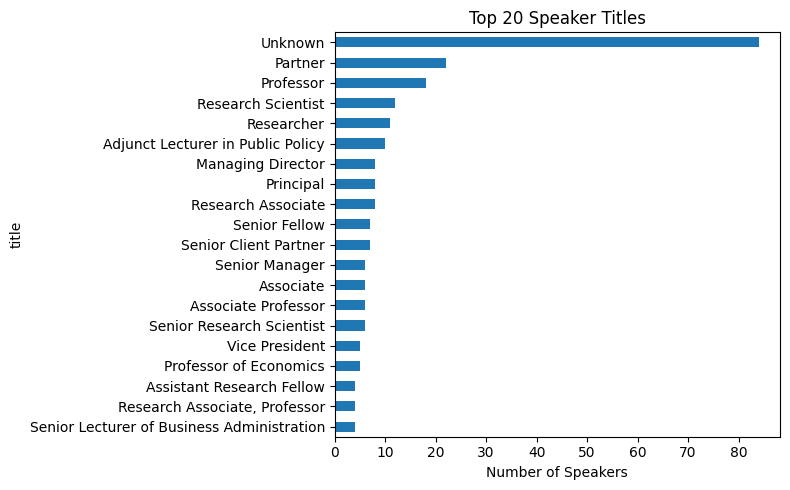

Top 20 Locations:
 location
Unknown                                          998
[Sichuan University, Chengdu, Sichuan, China]      1
[Cornell University, Ithaca, New York, USA]        1
Name: count, dtype: int64 



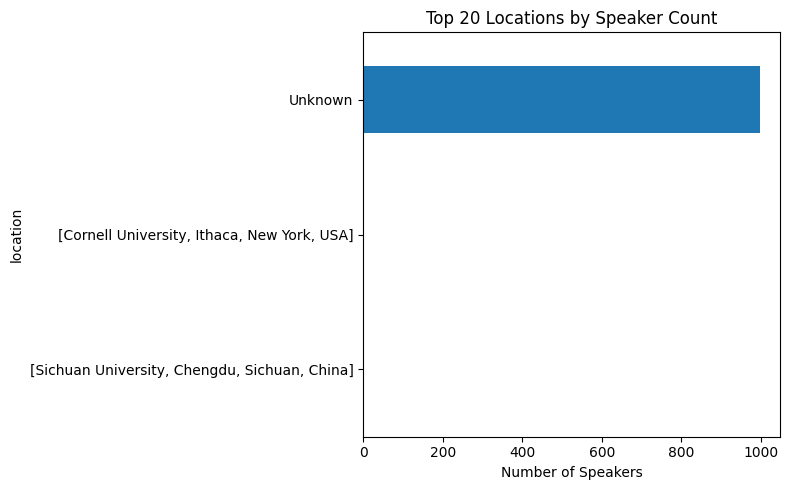

In [8]:
# 7. Distribution by company, title and location

# Top 20 companies
company_counts = df['company'].fillna('Unknown').value_counts().head(20)
print("Top 20 Companies:\n", company_counts, "\n")
plt.figure(figsize=(8,5))
company_counts.sort_values().plot(kind='barh')
plt.title('Top 20 Companies by Speaker Count')
plt.xlabel('Number of Speakers')
plt.tight_layout()
plt.show()

# Top 20 titles
title_counts = df['title'].fillna('Unknown').value_counts().head(20)
print("Top 20 Titles:\n", title_counts, "\n")
plt.figure(figsize=(8,5))
title_counts.sort_values().plot(kind='barh')
plt.title('Top 20 Speaker Titles')
plt.xlabel('Number of Speakers')
plt.tight_layout()
plt.show()

# Top 20 locations
loc_counts = df['location'].fillna('Unknown').value_counts().head(20)
print("Top 20 Locations:\n", loc_counts, "\n")
plt.figure(figsize=(8,5))
loc_counts.sort_values().plot(kind='barh')
plt.title('Top 20 Locations by Speaker Count')
plt.xlabel('Number of Speakers')
plt.tight_layout()
plt.show()